In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# nt = 50000
# dt = 0.1
# Nu = 1.2e-1      # Holton pp 58
# Ns = Nu/10.

      
#       nu = 0.12
#       ns = 0.012
#       dt = 0.1
# C                                                                                                                                 

#       w0d = 0.0001
#       w0 = 0.1
#       bs0d = 0.0001
#       bs0 = 0.1
#       bu0d = 0.0001
#       bu0 = 0.5

In [25]:
def sens_subplots(var, ax, title):
    cs = ax.plot(var)
    ax.set_title(title)

In [3]:
a = pd.read_csv('fort.16', delim_whitespace=True, 
                header=None, names=['a_w', 'a_bu', 'a_bs'])
a_w = a.a_w.values[::-1]
a_bu = a.a_bu.values[::-1]
a_bs = a.a_bs.values[::-1]

tlm = pd.read_csv('fort.15', delim_whitespace=True, 
                header=None, names=['tlm_w', 'tlm_bu', 'tlm_bs'])
tlm_w = tlm.tlm_w.values
tlm_bu = tlm.tlm_bu.values
tlm_bs = tlm.tlm_bs.values

nlm = pd.read_csv('fort.14', delim_whitespace=True, 
                header=None, names=['nlm_w', 'nlm_bu', 'nlm_bs'])
nlm_w = nlm.nlm_w.values
nlm_bu = nlm.nlm_bu.values
nlm_bs = nlm.nlm_bs.values

In [4]:
tlm_w[-1], tlm_bu[-1], tlm_bs[-1]

(138.21687010669154, 0.43755785356682436, 0.18438946339170606)

In [5]:
a_w[0], a_bu[0], a_bs[0]

(-64.89889955638559, -42468.8798348269, 234030.9429622741)

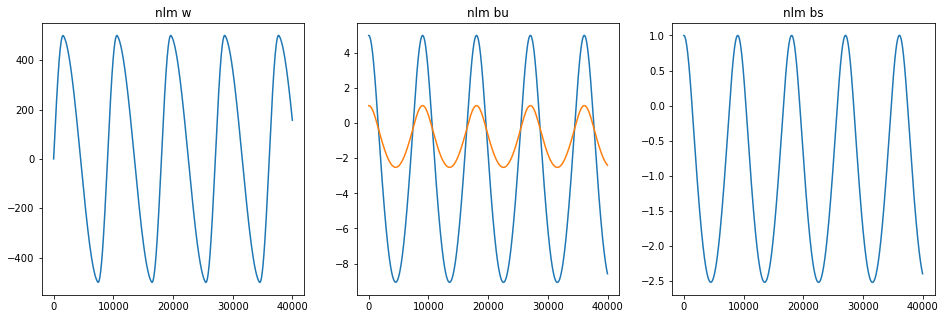

In [6]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,5))
sens_subplots(nlm_w, ax[0], "nlm w")
sens_subplots(nlm_bu, ax[1], "nlm bu")
sens_subplots(nlm_bs, ax[1], "nlm bu")
sens_subplots(nlm_bs, ax[2], "nlm bs")

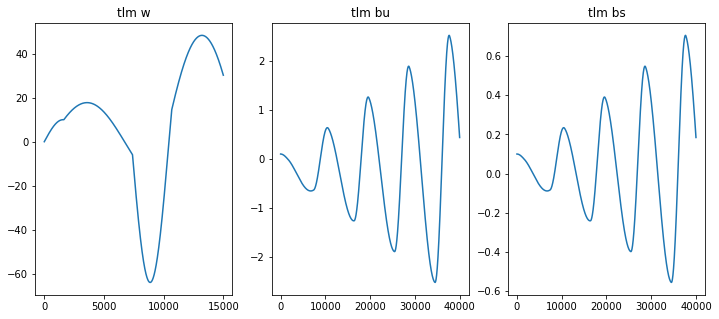

In [7]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,5))
sens_subplots(tlm_w[:15000], ax[0], 'tlm w')
sens_subplots(tlm_bu, ax[1], 'tlm bu')
sens_subplots(tlm_bs, ax[2], 'tlm bs')

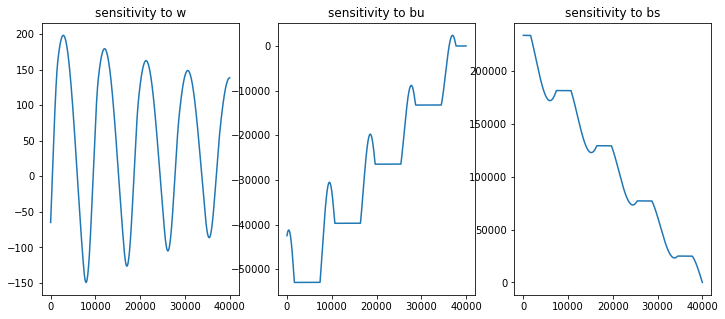

In [8]:
nrows = 1
ncols = 3
sk = 1
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,5))
sens_subplots(a_w[::sk], ax[0], 'sensitivity to w')
sens_subplots(a_bu[::sk], ax[1], 'sensitivity to bu')
sens_subplots(a_bs, ax[2], 'sensitivity to bs')

dR final = 19126.869861440497


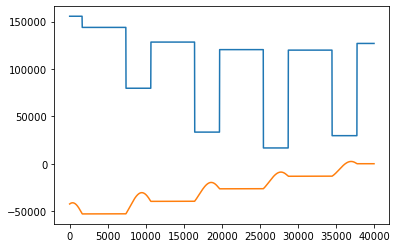

In [9]:
dR = tlm_w*a_w + tlm_bu*a_bu + tlm_bs*a_bs
plt.plot((dR-19000)*1000)
plt.plot(a_bu)
print(f'dR final = {tlm_w[-1]*a_w[-1] + tlm_bu[-1]*a_bu[-1] + tlm_bs[-1]*a_bs[-1]}')

In [11]:
len(a_bs), len(tlm_bs), len(nlm_bs)

(39991, 39991, 39991)

$<Lx'\cdot Lx'> = <L^T(Lx')\cdot x'>$

### verify ADJ
The correctness of the adjoint model can be check by the following algebraic expression
$$(\mathbf{P}_r\mathbf{z})^T(\mathbf{P}_r\mathbf{z}) = \mathbf{z}^T(\mathbf{P}_r^T(\mathbf{P}_r\mathbf{z}))$$

In [12]:
pz = np.array([tlm_w[-1], tlm_bu[-1], tlm_bs[-1]])
left = np.dot(pz, pz)

u = 0
z = np.array([tlm_w[u], tlm_bu[u], tlm_bs[u]])
pztpz = np.array([a_w[u], a_bu[u], a_bs[u]])
right = np.dot(z, pztpz)
left, right

(19104.12863843947, 19155.557323749155)

In [13]:
#a_w[0]*wp[0] + a_bu[0]*bup[0] + a_bs[0]*bsp[0], wt**2 + but**2 + bst**2
#wp[0]= 1e-4  bup[0] = 1e-5 bsp[0] = 1e-6
wp[-1]*wp[-1], a_w[0]*wp[0]

NameError: name 'wp' is not defined

### perturbation - control

In [14]:
nlm_ctrl = pd.read_csv('fort.14_ctrl', delim_whitespace=True, 
                header=None, names=['nlm_w', 'nlm_bu', 'nlm_bs'])
nlm_w_ctrl = nlm_ctrl.nlm_w.values
nlm_bu_ctrl = nlm_ctrl.nlm_bu.values
nlm_bs_ctrl = nlm_ctrl.nlm_bs.values

nlm_pert = pd.read_csv('fort.14_pert', delim_whitespace=True, 
                header=None, names=['nlm_w', 'nlm_bu', 'nlm_bs'])
nlm_w_pert = nlm_pert.nlm_w.values
nlm_bu_pert = nlm_pert.nlm_bu.values
nlm_bs_pert = nlm_pert.nlm_bs.values

w_diff = nlm_w_pert - nlm_w_ctrl[:-1]
bu_diff = nlm_bu_pert - nlm_bu_ctrl[:-1]
bs_diff = nlm_bs_pert - nlm_bs_ctrl[:-1]

In [18]:
def sens_axplots(var, ax, title):
    cs = ax.plot(var, label=title)

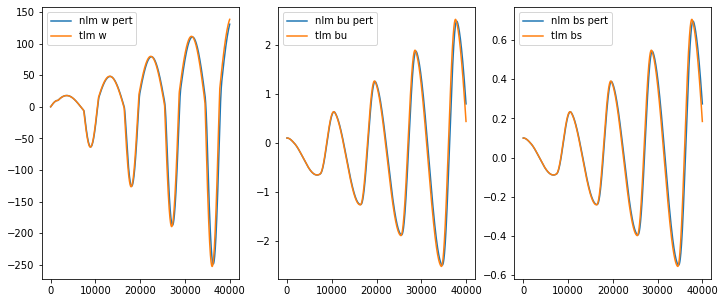

In [22]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,5))
sens_axplots(w_diff, ax[0], 'nlm w pert')
sens_axplots(bu_diff, ax[1], 'nlm bu pert')
sens_axplots(bs_diff, ax[2], 'nlm bs pert')

sens_axplots(tlm_w[:-1], ax[0], 'tlm w')
sens_axplots(tlm_bu[:-1], ax[1], 'tlm bu')
sens_axplots(tlm_bs[:-1], ax[2], 'tlm bs')
ax[0].legend()
ax[1].legend()
ax[2].legend()

### $\hat{w}$ = 1, $\hat{b}_u$ = 0, $\hat{b}_s$ = 0

In [23]:
a = pd.read_csv('fort.16', delim_whitespace=True, 
                header=None, names=['a_w', 'a_bu', 'a_bs'])
a_w1 = a.a_w.values[::-1]
a_bu0 = a.a_bu.values[::-1]
a_bs0 = a.a_bs.values[::-1]

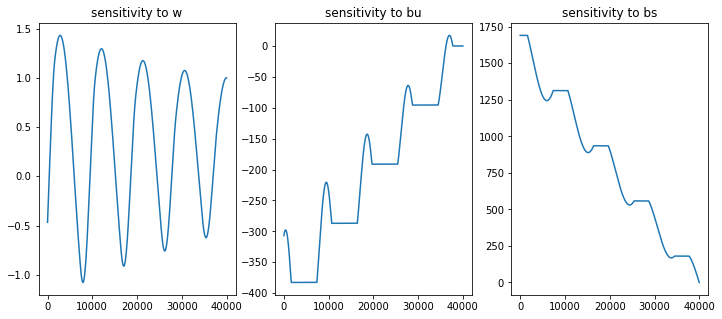

In [26]:
nrows = 1
ncols = 3

fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,5))
sens_subplots(a_w1, ax[0], 'sensitivity to w')
sens_subplots(a_bu0/a_bu0.max(), ax[1], 'sensitivity to bu')
sens_subplots(a_bs0/a_bs0.max(), ax[1], 'sensitivity to bs')
sens_subplots(a_bs0, ax[2], 'sensitivity to bs')


the bumps in bu and bs increase in magnitude